#  Predicting the sales price of BullDozers🚜 using Machine Learning
## 1. Problem Definition
    We should predict the sale price of bulldozer by using Regression model provided the train, validation and test data sets.
## 2. Data
    The data is downloaded from the kaggle bluebook bulldozer comTrain.csv is the training set, which contains data through the end of 2011.
The data is divided into three parts:

* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 .
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012.
* Train.csv is the training set, which contains data through the end of 2011.

## 3. Evaluation
    The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.
**Note: The goal for most regression metrics is to reduce the error between predictions and original values.**
## 4. Features
    
## 5. Modeling

## 6. Experimentation

In [97]:
%%time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

CPU times: total: 0 ns
Wall time: 0 ns


# Data

In [2]:
df = pd.read_csv('TrainAndValid.csv',low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [4]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [5]:
len(df[(df.SalePrice < 140000) & (df.SalePrice > 120000)])

1308

# Evaluation

<Axes: ylabel='Frequency'>

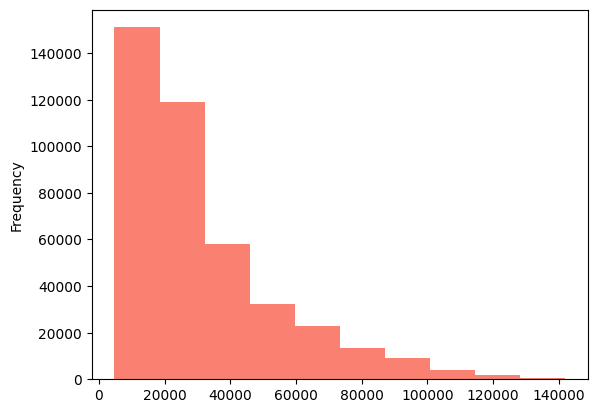

In [6]:
df.SalePrice.plot.hist(color='salmon')

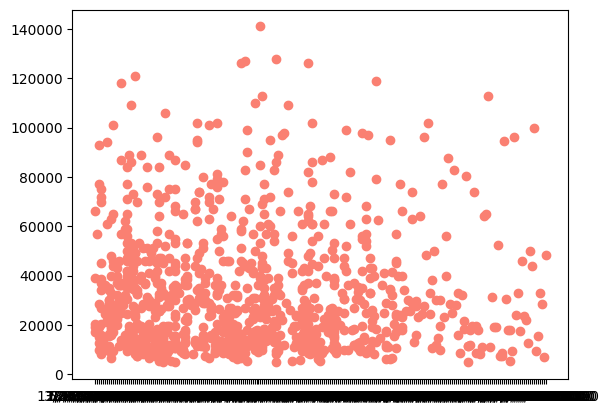

In [7]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000], c='salmon')

In [8]:
df = pd.read_csv('TrainAndValid.csv',low_memory=False, parse_dates=['saledate'])

In [9]:
df.saledate.dtype

dtype('<M8[ns]')

In [10]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

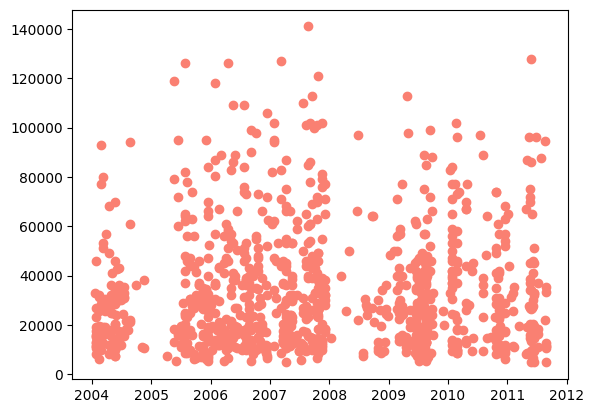

In [11]:
fig, ax = plt.subplots()
ax.scatter(df.saledate[:1000], df.SalePrice[:1000], c='salmon')

In [12]:
## Sorting dataframe based on saledate(when woring with time series data, it's a good idea to sort)
df.sort_values(by='saledate', inplace =True)

In [13]:
df.index = [i for i in range(len(df))]

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
1,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
3,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
4,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [15]:
# It's a good idea to copy the original data frame after making required changes
df_temp = df.copy()

# Feature Engineering
### Adding datetime parameters to the saledate column

In [16]:
df['SaleYear'] = df.saledate.dt.year
df['SaleMonth'] = df.saledate.dt.month
df['SaleDay'] = df.saledate.dt.day
df['SaleDayOfWeek'] = df.saledate.dt.day_of_week
df['SaleDayOfYear'] = df.saledate.dt.day_of_year

In [17]:
# Now we have enriched our saledate column. It's time to drop it.
df.drop('saledate',axis=1,inplace=True)

In [18]:
df.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

# Modelling

In [40]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [44]:
for label, content in df.items():
    if pd.api.types.is_object_dtype(content):
        df[label] = content.astype('category').cat.as_ordered()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 0 to 412697
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         74816 no

In [47]:
df.state.dtype

CategoricalDtype(categories=['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
                  'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
                  'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
                  'Kentucky', 'Louisiana', 'Maine', 'Maryland',
                  'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
                  'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
                  'New Jersey', 'New Mexico', 'New York', 'North Carolina',
                  'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
                  'Puerto Rico', 'Rhode Island', 'South Carolina',
                  'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah',
                  'Vermont', 'Virginia', 'Washington', 'Washington DC',
                  'West Virginia', 'Wisconsin', 'Wyoming'],
, ordered=True)

In [48]:
df.state.cat.codes

0         43
1          8
2          8
3          8
4          8
          ..
412693     4
412694     4
412695     4
412696     4
412697     4
Length: 412698, dtype: int8

In [53]:
df.isna().sum()/len(df)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

## Filling numerical missing values

In [70]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [68]:
df.auctioneerID.isna().sum(), df.MachineHoursCurrentMeter.isna().sum()

(20136, 265194)

In [76]:
df.auctioneerID.value_counts()

auctioneerID
1.0     192773
2.0      77577
3.0      30288
4.0      20877
99.0     12042
6.0      11950
7.0       7847
8.0       7419
5.0       7002
10.0      5876
9.0       4764
11.0      3823
12.0      3610
13.0      3068
18.0      2359
14.0      2277
20.0      2238
19.0      2074
16.0      1807
15.0      1742
21.0      1601
22.0      1429
24.0      1357
23.0      1322
17.0      1275
27.0      1150
25.0       959
28.0       860
26.0       796
0.0        536
Name: count, dtype: int64

In [72]:
df.auctioneerID.fillna(round(df.auctioneerID.median()),inplace=True)

In [73]:
df.MachineHoursCurrentMeter.fillna(round(df.MachineHoursCurrentMeter.median()),inplace=True)

In [74]:
df.auctioneerID.isna().sum(), df.MachineHoursCurrentMeter.isna().sum()

(0, 0)

In [75]:
for label, content in df.items():
    if pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum():
            print(label)

### Filling missing values in Categorical columns

In [88]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum():
            print(label)

UsageBand
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [89]:
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        df[label+'is_missing'] = pd.isnull(content)
        df[label] = pd.Categorical(content).codes + 1

In [91]:
# All categorical values are filled
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if df[label].isna().sum():
            print(label)

,0,1,2,3,4,5,6,7,8,9,...,412688,412689,412690,412691,412692,412693,412694,412695,412696,412697
SalesID,1646770,1821514,1505138,1671174,1329056,1301884,1379228,1645390,1493279,1449549,...,6283634,6282337,6311321,6306476,6281219,6302984,6324811,6313029,6266251,6283635
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0,23500.0,31000.0,11750.0,63000.0,13000.0,...,35000.0,7500.0,13000.0,53000.0,39000.0,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1126363,1194089,1473654,1327630,1336053,1182999,1082797,1527216,1363756,1289412,...,1930870,1928688,1823846,1278794,1792049,1915521,1919104,1918416,509560,1869284
ModelID,8434,10150,4139,8591,4089,4123,7620,8202,2759,3356,...,4701,22072,17311,9114,13976,5266,19330,17244,3357,4701
datasource,132,132,132,132,132,132,132,132,132,132,...,149,149,149,149,149,149,149,149,149,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Backhoe_Mountingis_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Blade_Typeis_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Travel_Controlsis_missing,False,True,False,True,False,False,True,True,False,True,...,True,True,True,True,True,False,True,True,True,True
Differential_Typeis_missing,True,False,True,False,True,True,False,False,True,True,...,False,True,True,False,True,True,True,True,True,False


In [98]:
%%time
np.random.seed(42)
model = RandomForestRegressor(n_jobs=-1)
model.fit(df.drop('SalePrice',axis=1) , df.SalePrice)

CPU times: total: 30min 26s
Wall time: 8min 1s


RandomForestRegressor(n_jobs=-1)

In [99]:
df_test = pd.read_csv('Test.csv')

In [102]:
 model.score(df.drop('SalePrice',axis=1) , df.SalePrice)

0.9875575311342472

**Question**

Why is the above model note perfectly reliable


## Splitting data into Train and Valid Sets

In [152]:
df_val = df[df.SaleYear == 2012]
df_train = df[df.SaleYear != 2012]

In [153]:
# Splitting into x and y datasets
x_train, y_train = df_train.drop('SalePrice',axis=1), df_train.SalePrice
x_val, y_val = df_val.drop('SalePrice',axis=1), df_val.SalePrice

(401125, 100)

# Building an evaluation function (RMSLE)

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_log_error 

In [116]:
def rmsle(y_test, y_preds):
    """
    calculate the root mean squared log error for the true and predicted labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

def show_scores(model):
    train_preds = model.predict(x_train)
    val_preds = model.predict(x_val)
    scores = {'Training MAE':mean_absolute_error(y_train, train_preds),
              'Valid MAE':mean_absolute_error(y_val, val_preds),
              'Training RMSLE':rmsle(y_train, train_preds),
              'valid RMSLE':rmsle(y_val, val_preds),
              'Training R^2':model.score(x_train, y_train),
              'Valid R^2':model.score(x_val, y_val)}
    return scores

In [111]:
%%time
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1, n_estimators=100, random_state=43, max_samples=10000)
model.fit(x_train, y_train)

CPU times: total: 1min 3s
Wall time: 18.2 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=43)

In [117]:
show_scores(model)

{'Training MAE': 5565.278293624181,
 'Valid MAE': 7128.0015536161745,
 'Training RMSLE': 0.2575462536560548,
 'valid RMSLE': 0.2921282413071744,
 'Training R^2': 0.8602397829986685,
 'Valid R^2': 0.8351109289285606}

In [122]:
%%time
# Hyperparameter tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators':np.arange(10,100,10),
       'max_depth':[None, 3, 5, 10],
       'min_samples_split':np.arange(2,20,2),
       'min_samples_leaf':np.arange(1,20,2),
       'max_features':[0.5,1,'sqrt','auto'],
       'max_samples':[20000]}

model = RandomForestRegressor(n_jobs=-1, random_state=42)
rs_model = RandomizedSearchCV(model,
                             param_distributions=grid,
                             n_iter=3,
                             cv=5,
                             verbose=True)
rs_model.fit(x_train, y_train)

C:\Users\91707\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\91707\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\91707\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packag

CPU times: total: 1min 5s
Wall time: 3min 28s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=3,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [20000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=False)

In [123]:
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 18,
 'min_samples_leaf': 3,
 'max_samples': 20000,
 'max_features': 0.5,
 'max_depth': None}

In [124]:
show_scores(rs_model)

{'Training MAE': 5599.473302847689,
 'Valid MAE': 6964.603237964639,
 'Training RMSLE': 0.25675736588233816,
 'valid RMSLE': 0.2835943436756889,
 'Training R^2': 0.8582976797312081,
 'Valid R^2': 0.8398448757904613}

# Training the model with best hyperparameters
These were found for n_iter = 100

In [126]:
%%time
ideal_model = RandomForestRegressor(n_estimators=40,
                                   min_samples_leaf=1,
                                   min_samples_split=14,
                                   max_features=0.5,
                                   n_jobs=-1,
                                   max_samples=None,random_state=42)
ideal_model.fit(x_train, y_train)

CPU times: total: 4min 53s
Wall time: 1min 19s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1, random_state=42)

In [127]:
show_scores(ideal_model)

{'Training MAE': 2957.709410683029,
 'Valid MAE': 5952.197444284608,
 'Training RMSLE': 0.14472725726514718,
 'valid RMSLE': 0.24732082136025826,
 'Training R^2': 0.9587007135389213,
 'Valid R^2': 0.8827621254674539}

In [135]:
%%time
df_test = pd.read_csv('Test.csv', low_memory=False, parse_dates=['saledate'])
df_test.saledate.dtype

CPU times: total: 109 ms
Wall time: 179 ms


dtype('<M8[ns]')

In [137]:
# Preprocessing the data (Making the test data into the same way as the trained data.)
df_test['SaleYear'] = df_test.saledate.dt.year
df_test['SaleMonth'] = df_test.saledate.dt.month
df_test['SaleDay'] = df_test.saledate.dt.day
df_test['SaleDayOfWeek'] = df_test.saledate.dt.day_of_week
df_test['SaleDayOfYear'] = df_test.saledate.dt.day_of_year

In [140]:
for label, content in df_test.items():
    if pd.api.types.is_object_dtype(content):
        df_test[label] = content.astype('category').cat.as_ordered()

# Filling numerical missing values

In [142]:
for label, content in df_test.items():
    if pd.api.types.is_numeric_dtype(content):
        if df_test[label].isna().sum():
            print(label)

MachineHoursCurrentMeter


In [143]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [145]:
df_test.auctioneerID.isna().sum(), df_test.MachineHoursCurrentMeter.isna().sum()

(0, 10328)

In [146]:
df_test.MachineHoursCurrentMeter.fillna(round(df_test.MachineHoursCurrentMeter.median()),inplace=True)

# Filling values in categorical columns

In [147]:
for label, content in df_test.items():
    if not pd.api.types.is_numeric_dtype(content):
        df_test[label+'is_missing'] = pd.isnull(content)
        df_test[label] = pd.Categorical(content).codes + 1

# It's time to make predictions on the test data

In [150]:
x_train.shape, df_test.shape

((401125, 100), (12457, 102))

In [169]:
i = x_train.columns
j=df_test.columns
[k+'------------------found :)' if k not in i else k for k in j]
# can also be done like this :( 
# set(j) - set(i)

['SalesID',
 'MachineID',
 'ModelID',
 'datasource',
 'auctioneerID',
 'YearMade',
 'MachineHoursCurrentMeter',
 'UsageBand',
 'saledate------------------found :)',
 'fiModelDesc',
 'fiBaseModel',
 'fiSecondaryDesc',
 'fiModelSeries',
 'fiModelDescriptor',
 'ProductSize',
 'fiProductClassDesc',
 'state',
 'ProductGroup',
 'ProductGroupDesc',
 'Drive_System',
 'Enclosure',
 'Forks',
 'Pad_Type',
 'Ride_Control',
 'Stick',
 'Transmission',
 'Turbocharged',
 'Blade_Extension',
 'Blade_Width',
 'Enclosure_Type',
 'Engine_Horsepower',
 'Hydraulics',
 'Pushblock',
 'Ripper',
 'Scarifier',
 'Tip_Control',
 'Tire_Size',
 'Coupler',
 'Coupler_System',
 'Grouser_Tracks',
 'Hydraulics_Flow',
 'Track_Type',
 'Undercarriage_Pad_Width',
 'Stick_Length',
 'Thumb',
 'Pattern_Changer',
 'Grouser_Type',
 'Backhoe_Mounting',
 'Blade_Type',
 'Travel_Controls',
 'Differential_Type',
 'Steering_Controls',
 'SaleYear',
 'SaleMonth',
 'SaleDay',
 'SaleDayOfWeek',
 'SaleDayOfYear',
 'UsageBandis_missing',
 'sa

In [171]:
df_test.drop('saledate',axis=1,inplace=True)
df_test.drop('saledateis_missing',axis=1,inplace=True)

# It's time to make predictions 😁

In [174]:
test_preds = ideal_model.predict(df_test)

In [175]:
test_preds.shape

(12457,)

In [176]:
# Kaggle is asking for a data frame of columns SalesID and Salesprice
df_preds = pd.DataFrame()
df_preds['SalesID'] = df_test.SalesID
df_preds['Saleprice'] = test_preds

In [180]:
# It's time to export the csv file
df_preds.to_csv('price_predictions.csv',index=False)

## Feature Importance
**Feature importance seeks to figure out which attributes in the data frame helps in predicting the target column in this project it's saleprice of a bulldozer.**

In [199]:
ideal_model.feature_importances_

array([3.20594417e-02, 2.24033728e-02, 4.31161588e-02, 2.18087858e-03,
       3.38752196e-03, 1.97737303e-01, 3.40717479e-03, 1.11864492e-03,
       4.62137915e-02, 4.77304681e-02, 6.14193538e-02, 4.57998241e-03,
       1.90760991e-02, 1.55797694e-01, 4.43102540e-02, 5.92807219e-03,
       3.32074836e-03, 3.93660965e-03, 2.68420606e-03, 7.10142589e-02,
       4.67390819e-04, 3.84868754e-05, 1.08416722e-03, 8.84761733e-04,
       1.64978998e-03, 2.74370793e-05, 2.10964975e-03, 3.00819436e-03,
       2.32158775e-03, 1.62610648e-04, 4.27866371e-03, 2.07112676e-03,
       2.99130576e-03, 1.67363701e-03, 2.49300761e-03, 1.08534273e-02,
       7.95405129e-04, 8.86162004e-03, 4.14065331e-03, 1.30352056e-03,
       1.10123735e-03, 8.94570772e-04, 2.70686221e-03, 5.68166419e-04,
       5.85264155e-04, 3.32652652e-04, 4.05627603e-04, 3.19576943e-03,
       1.12518739e-03, 3.18563500e-04, 2.26369422e-04, 7.39526956e-02,
       3.79439210e-03, 5.69334231e-03, 2.93728059e-03, 9.92075312e-03,
      

In [188]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,'feature_importances':importances}).
          sort_values('feature_importances',ascending=False).
          reset_index(drop=True))
    fig, ax = plt.subplots()
    ax.barh(df.features[:n],df.feature_importances[:n])
    ax.set_xlabel('Feature Importance')
    ax.set_ylabel('Feature Name')
    ax.invert_yaxis()

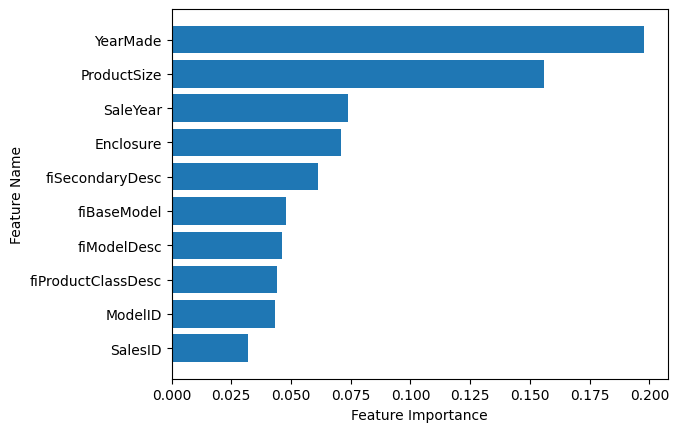

In [194]:
plot_features(x_train.columns, ideal_model.feature_importances_, 10)

In [201]:
list(ideal_model.feature_importances_).index(ideal_model.feature_importances_.max())

5

In [207]:
df_test.columns[5]

'YearMade'

In [209]:
df.Enclosure.value_counts(ascending=True, )

Enclosure
5         2
4         3
2        18
0       334
3     92601
1    141769
6    177971
Name: count, dtype: int64

**FINIFSHING QUESTION:** why might knowing the feature importances of trained data be helpful?

**FINAL CHALLENGE:** What other machine learning models can we use for this dataset?

[we cal also try XGBoost.ai or CatBoost.ai]